In [109]:
import pandas as pd

# Load the training set
train_set_path = './Datasets/train_added_subzone_planning_region.csv'
train_set = pd.read_csv(train_set_path)

# Display the first few rows of the training set to understand its structure
train_set.head()

C:\Users\User\AppData\Local\Temp\ipykernel_35476\515727765.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_set = pd.read_csv(train_set_path)


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,jurong east street 24,3 room,new generation,67.0,yes,1983.0,1.344518,103.738630,0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978.0,1.330186,103.938717,0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971.0,1.332242,103.845643,0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,pasir ris street 21,executive,apartment,149.0,yes,1993.0,1.370239,103.962894,0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,whampoa west,3-room,improved,68.0,yes,1972.0,1.320502,103.863341,0,bendemeer,kallang,central region,2100


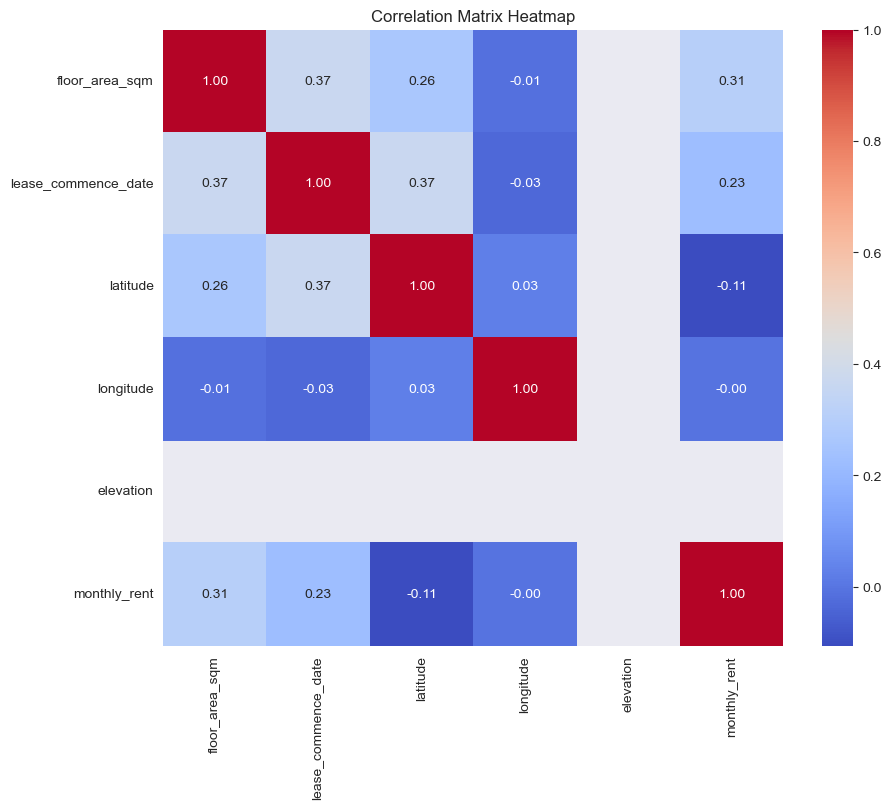

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical columns
num_data = train_set.select_dtypes(include=['float64', 'int64'])  # Selecting only numerical columns
correlation_matrix = num_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [111]:
# Set a threshold for correlation
threshold = 0.2

# Find columns with correlation less than the threshold
weak_correlations = correlation_matrix['monthly_rent'][abs(correlation_matrix['monthly_rent']) < threshold].index.tolist()

# Drop weakly correlated columns
train_set = train_set.drop(columns=weak_correlations)

# Drop useless columns
train_set = train_set.drop(columns=['elevation', 'furnished'])

# Display the remaining columns after dropping the weakly correlated ones
train_set.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,jurong east street 24,3 room,new generation,67.0,1983.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,1978.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,1971.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,pasir ris street 21,executive,apartment,149.0,1993.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,whampoa west,3-room,improved,68.0,1972.0,bendemeer,kallang,central region,2100


Ordinal data: If there's a clear ordering or ranking, then label encoding can be used.
Nominal data with low cardinality: One-hot encoding is often a good choice as it doesn't introduce an arbitrary ordering.
Nominal data with high cardinality: Consider using frequency encoding, binary encoding, or target encoding to avoid the curse of dimensionality that comes with one-hot encoding.

In [112]:
# One-hot encode the categorical columns
categorical_data = train_set.select_dtypes(include=['object', 'bool'])  # Selecting categorical columns

# Analyze the unique values in each categorical column
categorical_columns_info = {}
for col in categorical_data.columns:
    unique_values = categorical_data[col].nunique()
    categorical_columns_info[col] = {
        'unique_values': unique_values,
        'sample_values': categorical_data[col].dropna().unique()[:5]  # show up to 5 unique values as a sample
    }

categorical_columns_info

{'rent_approval_date': {'unique_values': 33,
  'sample_values': array(['2021-09', '2022-05', '2022-10', '2021-08', '2022-11'],
        dtype=object)},
 'town': {'unique_values': 26,
  'sample_values': array(['jurong east', 'bedok', 'toa payoh', 'pasir ris',
         'kallang/whampoa'], dtype=object)},
 'block': {'unique_values': 2697,
  'sample_values': array(['257', '119', '157', '250', '34'], dtype=object)},
 'street_name': {'unique_values': 1069,
  'sample_values': array(['jurong east street 24', 'bedok north road', 'lorong 1 toa payoh',
         'pasir ris street 21', 'whampoa west'], dtype=object)},
 'flat_type': {'unique_values': 10,
  'sample_values': array(['3 room', '4-room', '3-room', 'executive', '5 room'], dtype=object)},
 'flat_model': {'unique_values': 19,
  'sample_values': array(['new generation', 'improved', 'apartment', 'premium apartment',
         'simplified'], dtype=object)},
 'subzone': {'unique_values': 152,
  'sample_values': array(['yuhua east', 'bedok north',

1. **rent_approval_date**:
   - Unique Values: 33
   - This looks like a date or time series data that has been categorized by month and year.
   - Suggestion: Convert this to a numerical feature by parsing the year and possibly the month if seasonality is expected to affect rental prices. If the month is less important, just the year could be used.

2. **town**:
   - Unique Values: 26
   - These are nominal with low to moderate cardinality.
   - Suggestion: One-hot encoding can be used, as it will create an additional 26 features which is manageable.

3. **block**:
   - Unique Values: 2697
   - This is likely nominal with high cardinality.
   - Suggestion: Due to the high cardinality, one-hot encoding would create too many features, so frequency encoding or target encoding would be more appropriate.

4. **street_name**:
   - Unique Values: 1069
   - This is also nominal with high cardinality.
   - Suggestion: Similar to `block`, frequency encoding or target encoding would be suitable.

5. **flat_type**:
   - Unique Values: 10
   - This could be ordinal if the flat types have a natural order (e.g., from small to large), or nominal if there's no such order.
   - Suggestion: If there is a clear order, use label encoding; otherwise, use one-hot encoding.

6. **flat_model**:
   - Unique Values: 19
   - This is likely nominal with moderate cardinality.
   - Suggestion: One-hot encoding could still be used if the computational resources allow; otherwise, frequency or binary encoding could be alternatives.

7. **furnished**:
   - Unique Values: 1
   - This column has only one value, which means it provides no variability and can be dropped as it won't provide any predictive power.

8. **subzone**:
   - Unique Values: 152
   - This is nominal with moderate to high cardinality.
   - Suggestion: Frequency encoding or target encoding would be suitable.

9. **planning_area**:
   - Unique Values: 29
   - This is nominal with low to moderate cardinality.
   - Suggestion: One-hot encoding is manageable here.

10. **region**:
    - Unique Values: 5
    - This is nominal with low cardinality.
    - Suggestion: One-hot encoding would be appropriate and would not add too many features.

In summary:
- One-hot encoding is recommended for `town`, `planning_area`, and `region`.
- For `block` and `street_name`, with high cardinality, frequency encoding or target encoding would reduce dimensionality.
- For `flat_type` and `flat_model`, the encoding would depend on whether there's an order to the types. If not, one-hot encoding is suggested for `flat_model`, and a decision needs to be made for `flat_type`.
- The `furnished` column should be dropped as it has no variance.
- `rent_approval_date` should be converted to a numerical feature based on the year and possibly the month.
- `subzone` can use frequency or target encoding due to higher cardinality.

In [113]:
# Convert 'rent_approval_date' to datetime directly in the original dataframe
train_set['rent_approval_date'] = pd.to_datetime(train_set['rent_approval_date'], format='%Y-%m')

# Extract year and month from 'rent_approval_date'
train_set['approval_year'] = train_set['rent_approval_date'].dt.year
train_set['approval_month'] = train_set['rent_approval_date'].dt.month

# Drop the original 'rent_approval_date' column as it's no longer needed
train_set.drop('rent_approval_date', axis=1, inplace=True)

# Display the dataframe with the new year and month columns
train_set[['approval_year', 'approval_month']].head()

,approval_year,approval_month
0,2021,9
1,2022,5
2,2022,10
3,2021,8
4,2022,11


In [114]:
train_set.head()

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,planning_area,region,monthly_rent,approval_year,approval_month
0,jurong east,257,jurong east street 24,3 room,new generation,67.0,1983.0,yuhua east,jurong east,west region,1600,2021,9
1,bedok,119,bedok north road,4-room,new generation,92.0,1978.0,bedok north,bedok,east region,2250,2022,5
2,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,1971.0,toa payoh central,toa payoh,central region,1900,2022,10
3,pasir ris,250,pasir ris street 21,executive,apartment,149.0,1993.0,pasir ris drive,pasir ris,east region,2850,2021,8
4,kallang/whampoa,34,whampoa west,3-room,improved,68.0,1972.0,bendemeer,kallang,central region,2100,2022,11


In [115]:
# Step 2: One-hot encode 'planning_area', and 'region'
one_hot_columns = ['planning_area', 'region']
train_set = pd.get_dummies(train_set, columns=one_hot_columns)

train_set.head()

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,monthly_rent,approval_year,...,planning_area_serangoon,planning_area_tampines,planning_area_toa payoh,planning_area_woodlands,planning_area_yishun,region_central region,region_east region,region_north region,region_north-east region,region_west region
0,jurong east,257,jurong east street 24,3 room,new generation,67.0,1983.0,yuhua east,1600,2021,...,False,False,False,False,False,False,False,False,False,True
1,bedok,119,bedok north road,4-room,new generation,92.0,1978.0,bedok north,2250,2022,...,False,False,False,False,False,False,True,False,False,False
2,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,1971.0,toa payoh central,1900,2022,...,False,False,True,False,False,True,False,False,False,False
3,pasir ris,250,pasir ris street 21,executive,apartment,149.0,1993.0,pasir ris drive,2850,2021,...,False,False,False,False,False,False,True,False,False,False
4,kallang/whampoa,34,whampoa west,3-room,improved,68.0,1972.0,bendemeer,2100,2022,...,False,False,False,False,False,True,False,False,False,False


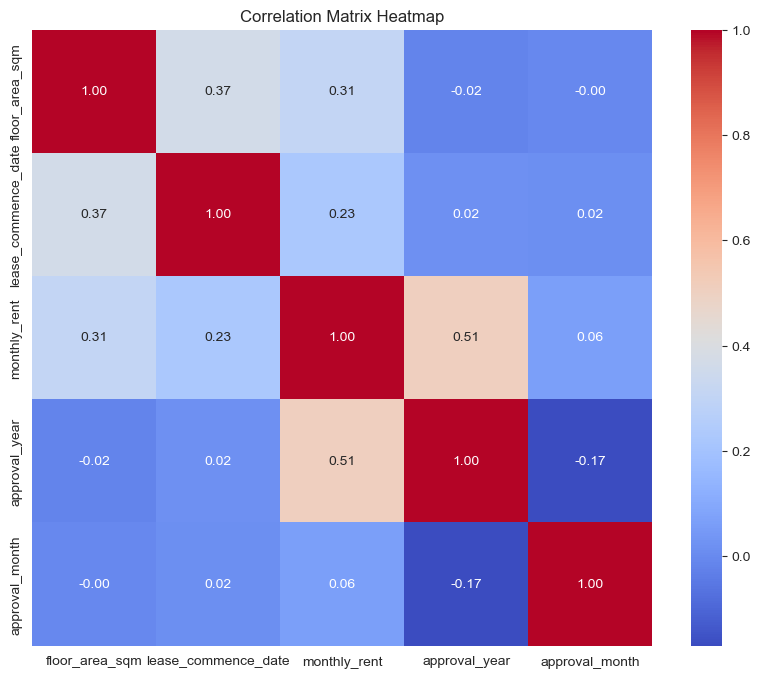

In [116]:
# Compute the correlation matrix for numerical columns
num_data = train_set.select_dtypes(include=['float64', 'int64', 'float', 'int'])  # Selecting only numerical columns
correlation_matrix = num_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [117]:
# Set a threshold for correlation
threshold = 0.2

# Find columns with correlation less than the threshold
weak_correlations = correlation_matrix['monthly_rent'][abs(correlation_matrix['monthly_rent']) < threshold].index.tolist()

# Drop weakly correlated columns
train_set = train_set.drop(columns=weak_correlations)

# Display the remaining columns after dropping the weakly correlated ones
train_set.head()

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,monthly_rent,approval_year,...,planning_area_serangoon,planning_area_tampines,planning_area_toa payoh,planning_area_woodlands,planning_area_yishun,region_central region,region_east region,region_north region,region_north-east region,region_west region
0,jurong east,257,jurong east street 24,3 room,new generation,67.0,1983.0,yuhua east,1600,2021,...,False,False,False,False,False,False,False,False,False,True
1,bedok,119,bedok north road,4-room,new generation,92.0,1978.0,bedok north,2250,2022,...,False,False,False,False,False,False,True,False,False,False
2,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,1971.0,toa payoh central,1900,2022,...,False,False,True,False,False,True,False,False,False,False
3,pasir ris,250,pasir ris street 21,executive,apartment,149.0,1993.0,pasir ris drive,2850,2021,...,False,False,False,False,False,False,True,False,False,False
4,kallang/whampoa,34,whampoa west,3-room,improved,68.0,1972.0,bendemeer,2100,2022,...,False,False,False,False,False,True,False,False,False,False


In [118]:
# List all columns that were one-hot encoded for 'region' and 'town'
region_columns = [col for col in train_set.columns if col.startswith('region_')]
planning_area_columns = [col for col in train_set.columns if col.startswith('planning_area')]

print("Region columns:", region_columns)
print("Planning Area columns:", planning_area_columns)

Region columns: ['region_central region', 'region_east region', 'region_north region', 'region_north-east region', 'region_west region']
Planning Area columns: ['planning_area_ang mo kio', 'planning_area_bedok', 'planning_area_bishan', 'planning_area_bukit batok', 'planning_area_bukit merah', 'planning_area_bukit panjang', 'planning_area_bukit timah', 'planning_area_choa chu kang', 'planning_area_clementi', 'planning_area_downtown core', 'planning_area_geylang', 'planning_area_hougang', 'planning_area_jurong east', 'planning_area_jurong west', 'planning_area_kallang', 'planning_area_marine parade', 'planning_area_novena', 'planning_area_outram', 'planning_area_pasir ris', 'planning_area_punggol', 'planning_area_queenstown', 'planning_area_rochor', 'planning_area_sembawang', 'planning_area_sengkang', 'planning_area_serangoon', 'planning_area_tampines', 'planning_area_toa payoh', 'planning_area_woodlands', 'planning_area_yishun']


In [119]:
# Check for low variance in one-hot encoded columns
low_variance_columns = [col for col in region_columns + planning_area_columns if train_set[col].var() < 0.01]

print("Low variance columns:", low_variance_columns)

Low variance columns: ['planning_area_bukit timah', 'planning_area_downtown core', 'planning_area_novena', 'planning_area_outram']


In [120]:
import numpy as np
# Convert boolean columns to integers
for col in region_columns + planning_area_columns:
    if train_set[col].dtype == 'bool':
        train_set[col] = train_set[col].astype(int)

# Now you can compute the correlation matrix
numeric_columns = train_set.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix = correlation_matrix['monthly_rent'].sort_values()
# show full list correla
correlation_matrix

region_north region           -0.071923
planning_area_yishun          -0.060557
planning_area_ang mo kio      -0.057498
planning_area_bedok           -0.053004
planning_area_woodlands       -0.040438
planning_area_bukit batok     -0.037874
planning_area_hougang         -0.029696
planning_area_geylang         -0.025559
region_north-east region      -0.023066
planning_area_bukit panjang   -0.021357
planning_area_choa chu kang   -0.020975
planning_area_toa payoh       -0.017739
region_west region            -0.016088
region_east region            -0.012575
planning_area_sembawang       -0.009710
planning_area_marine parade   -0.003318
planning_area_novena           0.000240
planning_area_jurong east      0.001150
planning_area_downtown core    0.009908
planning_area_serangoon        0.011865
planning_area_sengkang         0.014175
planning_area_kallang          0.015178
planning_area_tampines         0.015700
planning_area_clementi         0.016423
planning_area_jurong west      0.016618


In [123]:
# Set a threshold for correlation
threshold = 0.2

# Find columns with correlation less than the threshold
weak_correlations = correlation_matrix[abs(correlation_matrix) < threshold].index.tolist()

# Drop weakly correlated columns
train_set = train_set.drop(columns=weak_correlations)

# Display the remaining columns after dropping the weakly correlated ones
train_set.head()

,town,block,street_name,flat_type,flat_model,floor_area_sqm,lease_commence_date,subzone,monthly_rent,approval_year
0,jurong east,257,jurong east street 24,3 room,new generation,67.0,1983.0,yuhua east,1600,2021
1,bedok,119,bedok north road,4-room,new generation,92.0,1978.0,bedok north,2250,2022
2,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,1971.0,toa payoh central,1900,2022
3,pasir ris,250,pasir ris street 21,executive,apartment,149.0,1993.0,pasir ris drive,2850,2021
4,kallang/whampoa,34,whampoa west,3-room,improved,68.0,1972.0,bendemeer,2100,2022


In [126]:
# Drop 'subzone' and 'flat_model' columns
train_set.drop(['subzone', 'flat_model'], axis=1, inplace=True)

# Display the first few rows to confirm the drop
train_set.head()

,town,block,street_name,flat_type,floor_area_sqm,lease_commence_date,monthly_rent,approval_year
0,jurong east,257,jurong east street 24,3 room,67.0,1983.0,1600,2021
1,bedok,119,bedok north road,4 room,92.0,1978.0,2250,2022
2,toa payoh,157,lorong 1 toa payoh,3 room,67.0,1971.0,1900,2022
3,pasir ris,250,pasir ris street 21,executive,149.0,1993.0,2850,2021
4,kallang/whampoa,34,whampoa west,3 room,68.0,1972.0,2100,2022


In [124]:
# Correcting the 'flat_type' inconsistencies by merging '5 room' and '5-room' into one category
train_set['flat_type'] = train_set['flat_type'].str.replace('-', ' ').str.lower()

# Verifying the correction in the 'flat_type' column
train_set['flat_type'].value_counts()

flat_type
4 room       59149
3 room       53159
5 room       39702
executive     9411
2 room        2812
1 room          27
Name: count, dtype: int64

In [128]:
# One-hot encode 'flat_type'
train_set = pd.get_dummies(train_set, columns=['flat_type'])
train_set.head()

,town,block,street_name,floor_area_sqm,lease_commence_date,monthly_rent,approval_year,flat_type_1 room,flat_type_2 room,flat_type_3 room,flat_type_4 room,flat_type_5 room,flat_type_executive
0,jurong east,257,jurong east street 24,67.0,1983.0,1600,2021,False,False,True,False,False,False
1,bedok,119,bedok north road,92.0,1978.0,2250,2022,False,False,False,True,False,False
2,toa payoh,157,lorong 1 toa payoh,67.0,1971.0,1900,2022,False,False,True,False,False,False
3,pasir ris,250,pasir ris street 21,149.0,1993.0,2850,2021,False,False,False,False,False,True
4,kallang/whampoa,34,whampoa west,68.0,1972.0,2100,2022,False,False,True,False,False,False


In [135]:
from sklearn.model_selection import KFold

def target_encode_leave_one_out(df, column, target, n_splits=5):
    """
    Perform target encoding with leave-one-out strategy.
    
    :param df: DataFrame with the data.
    :param column: Name of the column to encode.
    :param target: Name of the target column.
    :param n_splits: Number of splits for cross-validation.
    :return: The DataFrame with the encoded column.
    """
    # Copy the DataFrame to avoid modifying the original one
    df_copy = df.copy()

    # Initialize the column for encoded values
    df_copy[f'{column}_encoded'] = 0

    # Create KFold object
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(df):
        # Split the data into training and validation sets
        df_train, df_val = df.iloc[train_index], df.iloc[val_index]

        # Compute the mean target for each category
        category_means = df_train.groupby(column)[target].mean()

        # Map the mean target value of the encoded column to the validation set
        df_copy.loc[val_index, f'{column}_encoded'] = df_val[column].map(category_means)

    # For the overall mean to fill NA
    overall_mean = df[target].mean()
    df_copy[f'{column}_encoded'].fillna(overall_mean, inplace=True)

    return df_copy

# Apply the target encoding function to 'town', 'block' and 'street_name' columns
for column in ['town', 'block', 'street_name']:
    train_set = target_encode_leave_one_out(train_set, column, 'monthly_rent')

# drop target encoded columns
train_set.drop(['town', 'block', 'street_name'], axis=1, inplace=True)

In [136]:
train_set.head()

,floor_area_sqm,lease_commence_date,monthly_rent,approval_year,flat_type_1 room,flat_type_2 room,flat_type_3 room,flat_type_4 room,flat_type_5 room,flat_type_executive,town_encoded,block_encoded,street_name_encoded
0,67.0,1983.0,1600,2021,False,False,True,False,False,False,2552.437739,2404.741379,2350.833333
1,92.0,1978.0,2250,2022,False,False,False,True,False,False,2393.140621,2308.524590,2400.554017
2,67.0,1971.0,1900,2022,False,False,True,False,False,False,2482.165320,2387.331081,2400.827423
3,149.0,1993.0,2850,2021,False,False,False,False,False,True,2647.181004,2345.547945,2749.404762
4,68.0,1972.0,2100,2022,False,False,True,False,False,False,2602.775929,2421.555794,2379.166667


In [137]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = train_set.drop('monthly_rent', axis=1)  # Features
y = train_set['monthly_rent']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((131408, 12), (32852, 12), (131408,), (32852,))

In [129]:
train_set.to_csv('./Datasets/final-data/train_set_inter.csv', index=False)

In [141]:
from tpot import TPOTRegressor

# Create a TPOT regressor
tpot = TPOTRegressor(
    generations=30,  # Number of iterations to the run pipeline optimization process
    population_size=40,  # Number of individuals to retain in the genetic programming population every generation
    verbosity=2,  # Show progress
    random_state=42,  # Seed for reproducibility
    n_jobs=-1,  # Use all available cores
)

# Run the TPOT optimization
tpot.fit(X_train, y_train)

# Score on the test set
print("Test Score: ", tpot.score(X_test, y_test))

# Export the best pipeline as a Python script
tpot.export('best_pipeline_new_updated.py')


Imputing missing values in feature set


Optimization Progress:   0%|          | 0/1240 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -250772.92631240547

Generation 2 - Current best internal CV score: -249977.373961034

Generation 3 - Current best internal CV score: -249977.373961034

Generation 4 - Current best internal CV score: -249977.373961034

Generation 5 - Current best internal CV score: -249977.373961034

Generation 6 - Current best internal CV score: -249977.373961034

Generation 7 - Current best internal CV score: -249977.373961034

Generation 8 - Current best internal CV score: -249890.8810204147

Generation 9 - Current best internal CV score: -249890.8810204147

Generation 10 - Current best internal CV score: -249785.57939305715

Generation 11 - Current best internal CV score: -249785.57939305715

Generation 12 - Current best internal CV score: -249763.13284063153

Generation 13 - Current best internal CV score: -249750.81617689953

Generation 14 - Current best internal CV score: -249747.65768577886

Generation 15 - Current best internal CV score: -249694.